<a href="https://colab.research.google.com/github/joshimohitm9/Feature-Engineering/blob/main/Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
link="https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day24-standardization/Social_Network_Ads.csv"
df=pd.read_csv(link)
df=df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop(["Purchased"],axis=1)
y=df["Purchased"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
x_train.shape,x_test.shape

((320, 2), (80, 2))

In [ ]:
from sklearn.preprocessing  import StandardScaler
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)
x_train_scaled

,Age,EstimatedSalary
0,-0.803301,-1.191218
1,0.756980,-1.368598
2,0.854498,1.439920
3,-0.510748,-1.486851
4,-1.485924,0.375639
...,...,...
315,1.439603,0.641709
316,-1.680959,-1.339035
317,1.342085,-1.339035
318,0.854498,0.316513


Text(0.5, 1.0, 'After')

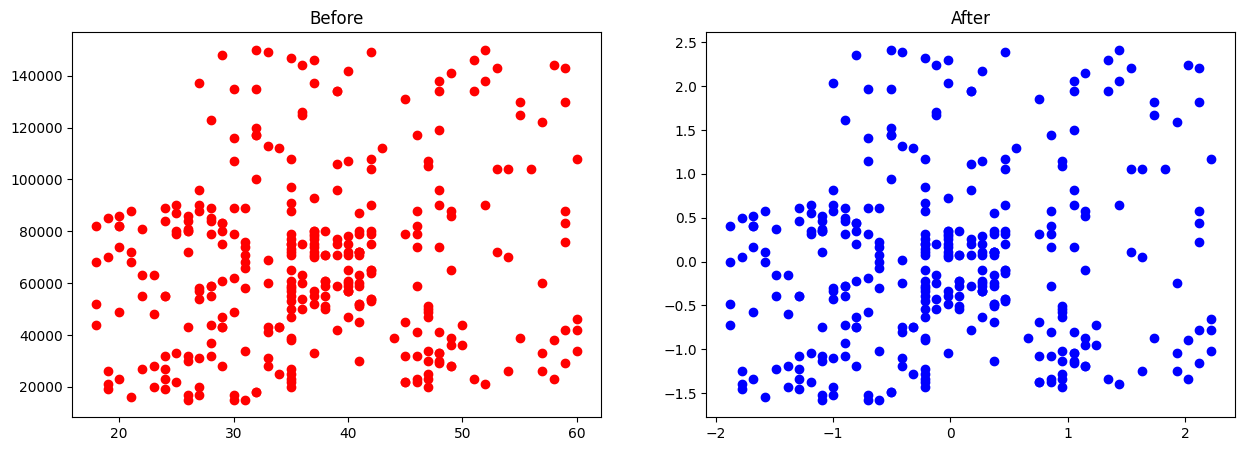

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(x_train.Age,x_train.EstimatedSalary,color="red")
plt.title("Before")
plt.subplot(1,2,2)
plt.scatter(x_train_scaled.Age,x_train_scaled.EstimatedSalary,color="blue")
plt.title("After")


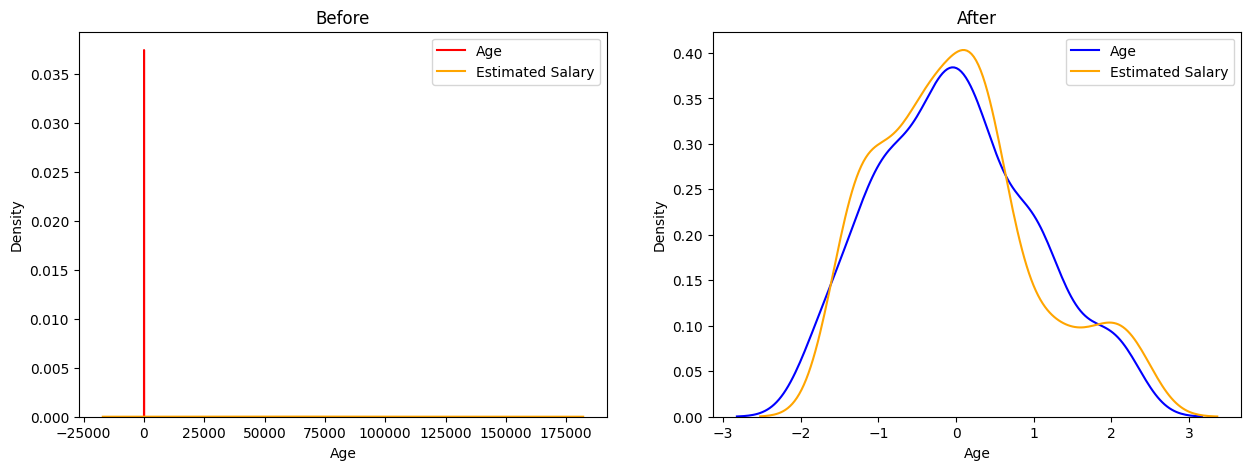

In [ ]:
import seaborn as sns
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.kdeplot(x_train.Age, color="red", label="Age")
sns.kdeplot(x_train.EstimatedSalary, color='orange', label="Estimated Salary")
plt.title("Before")
plt.legend()

plt.subplot(1, 2, 2)
sns.kdeplot(x_train_scaled.Age, color="blue", label="Age")
sns.kdeplot(x_train_scaled.EstimatedSalary, color='orange', label="Estimated Salary")
plt.title("After")
plt.legend()

plt.show()


In [ ]:
x_train_scaled

,Age,EstimatedSalary
0,-0.803301,-1.191218
1,0.756980,-1.368598
2,0.854498,1.439920
3,-0.510748,-1.486851
4,-1.485924,0.375639
...,...,...
315,1.439603,0.641709
316,-1.680959,-1.339035
317,1.342085,-1.339035
318,0.854498,0.316513


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr_scaled=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LinearRegression()

In [ ]:
lr.score(x_test,y_test)

0.4496950596630753

In [ ]:
lr_scaled.score(x_test_scaled,y_test)

0.4496950596630753

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
from re import A
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
Ridge_regressor=Ridge()
Ridge_regressor_scaled=Ridge()

parameters={
    "alpha":[1,2,3,5,7,9,15,20,25,30,35,40,50,60,70,80,90,100]
}

ridgecv=GridSearchCV(Ridge_regressor,parameters,cv=5)
ridgecv_scaled=GridSearchCV(Ridge_regressor_scaled,parameters,cv=5)

ridgecv.fit(x_train,y_train)
ridgecv_scaled.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 5, 7, 9, 15, 20, 25, 30, 35, 40, 50,
                                   60, 70, 80, 90, 100]})

In [ ]:
ridgecv_scaled.best_params_

{'alpha': 3}

In [ ]:
ridgecv.best_params_

{'alpha': 100}

In [ ]:
Ridge_regressor=Ridge(alpha=100)
Ridge_regressor_scaled=Ridge(alpha=38)

ridgecv.fit(x_train,y_train)
ridgecv_scaled.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 5, 7, 9, 15, 20, 25, 30, 35, 40, 50,
                                   60, 70, 80, 90, 100]})

In [ ]:
ridgecv.score(x_test,y_test),ridgecv_scaled.score(x_test_scaled,y_test)

(0.44963251876331733, 0.4503627110068016)

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_model=Lasso(alpha=6378)
lasso_model.fit(x_train_scaled,y_train)

Lasso(alpha=6378)

In [ ]:
lasso_model.score(x_train_scaled,y_train)

0.0